In [19]:
import pandas as pd
from datetime import datetime

In [20]:
chunksize = 10 ** 6
num_of_chunks = 0
train = pd.DataFrame()
parse_date = lambda val : datetime.strptime(val, '%y%m%d%H')

for chunk in pd.read_csv(
        '/home/stefan/Documents/projects/data/avazu-ctr-prediction/train',
        parse_dates=['hour'],
        date_parser=parse_date,
        chunksize=chunksize):
    num_of_chunks += 1
    train = pd.concat([train, chunk.sample(frac=0.5, replace=False, random_state=1234)], axis=0)
    print(f'Processing chunk number: {num_of_chunks}')

train.reset_index(inplace=True)
train_len = len(train)
train_len

Processing chunk number: 1
Processing chunk number: 2
Processing chunk number: 3
Processing chunk number: 4
Processing chunk number: 5
Processing chunk number: 6
Processing chunk number: 7
Processing chunk number: 8
Processing chunk number: 9
Processing chunk number: 10
Processing chunk number: 11
Processing chunk number: 12
Processing chunk number: 13
Processing chunk number: 14
Processing chunk number: 15
Processing chunk number: 16
Processing chunk number: 17
Processing chunk number: 18
Processing chunk number: 19
Processing chunk number: 20
Processing chunk number: 21
Processing chunk number: 22
Processing chunk number: 23
Processing chunk number: 24
Processing chunk number: 25
Processing chunk number: 26
Processing chunk number: 27
Processing chunk number: 28
Processing chunk number: 29
Processing chunk number: 30
Processing chunk number: 31
Processing chunk number: 32
Processing chunk number: 33
Processing chunk number: 34
Processing chunk number: 35
Processing chunk number: 36
P

20214484

In [22]:
train['month'] = train['hour'].dt.month
train['dayofweek'] = train['hour'].dt.dayofweek
train['day'] = train['hour'].dt.day
train['hour_time'] = train['hour'].dt.hour
train.head(2)

,index,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
0,433572,7.583e+18,1,2014-10-21 02:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,...,50,2201,3,35,-1,43,10,1,21,2
1,254298,9.743e+17,0,2014-10-21 01:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,9f06e9a1,...,50,2480,3,297,100111,61,10,1,21,1


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20214484 entries, 0 to 20214483
Data columns (total 29 columns):
 #   Column            Dtype         
---  ------            -----         
 0   index             int64         
 1   id                float64       
 2   click             int64         
 3   hour              datetime64[ns]
 4   C1                int64         
 5   banner_pos        int64         
 6   site_id           object        
 7   site_domain       object        
 8   site_category     object        
 9   app_id            object        
 10  app_domain        object        
 11  app_category      object        
 12  device_id         object        
 13  device_ip         object        
 14  device_model      object        
 15  device_type       int64         
 16  device_conn_type  int64         
 17  C14               int64         
 18  C15               int64         
 19  C16               int64         
 20  C17               int64         
 21  C18   

In [26]:
train.isnull().sum()

index               0
id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour_time           0
dtype: int64

In [36]:
train.describe()

,index,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
count,"20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00","20,214,484.00"
mean,"20,214,188.29","9,223,367,819,743,735,808.00",0.17,"1,004.97",0.29,1.02,0.33,"18,842.26",318.89,60.10,"2,112.63",1.43,227.09,"53,205.81",83.39,10.00,2.60,25.47,11.28
std,"11,670,842.99","5,325,717,400,289,953,792.00",0.38,1.09,0.51,0.53,0.85,"4,958.36",21.31,47.28,609.33,1.33,350.94,"49,957.52",70.29,0.00,1.73,2.96,5.95
min,0.00,"521,159,373,627.00",0.00,"1,001.00",0.00,0.00,0.00,375.00,120.00,20.00,112.00,0.00,33.00,-1.00,1.00,10.00,0.00,21.00,0.00
25%,"10,106,988.50","4,611,099,840,522,829,824.00",0.00,"1,005.00",0.00,1.00,0.00,"16,920.00",320.00,50.00,"1,863.00",0.00,35.00,-1.00,23.00,10.00,1.00,23.00,6.00
50%,"20,214,221.50","9,224,302,546,706,825,216.00",0.00,"1,005.00",0.00,1.00,0.00,"20,346.00",320.00,50.00,"2,323.00",2.00,39.00,"100,048.00",61.00,10.00,2.00,26.00,11.00
75%,"30,321,115.50","13,837,285,066,782,285,824.00",0.00,"1,005.00",1.00,1.00,0.00,"21,894.00",320.00,50.00,"2,526.00",3.00,171.00,"100,093.00",101.00,10.00,4.00,28.00,16.00
max,"40,428,966.00","18,446,743,972,517,787,648.00",1.00,"1,012.00",7.00,5.00,5.00,"24,052.00","1,024.00","1,024.00","2,758.00",3.00,"1,959.00","100,248.00",255.00,10.00,6.00,30.00,23.00


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = train.corr()

/tmp/ipykernel_35303/2500169356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


<Axes: >

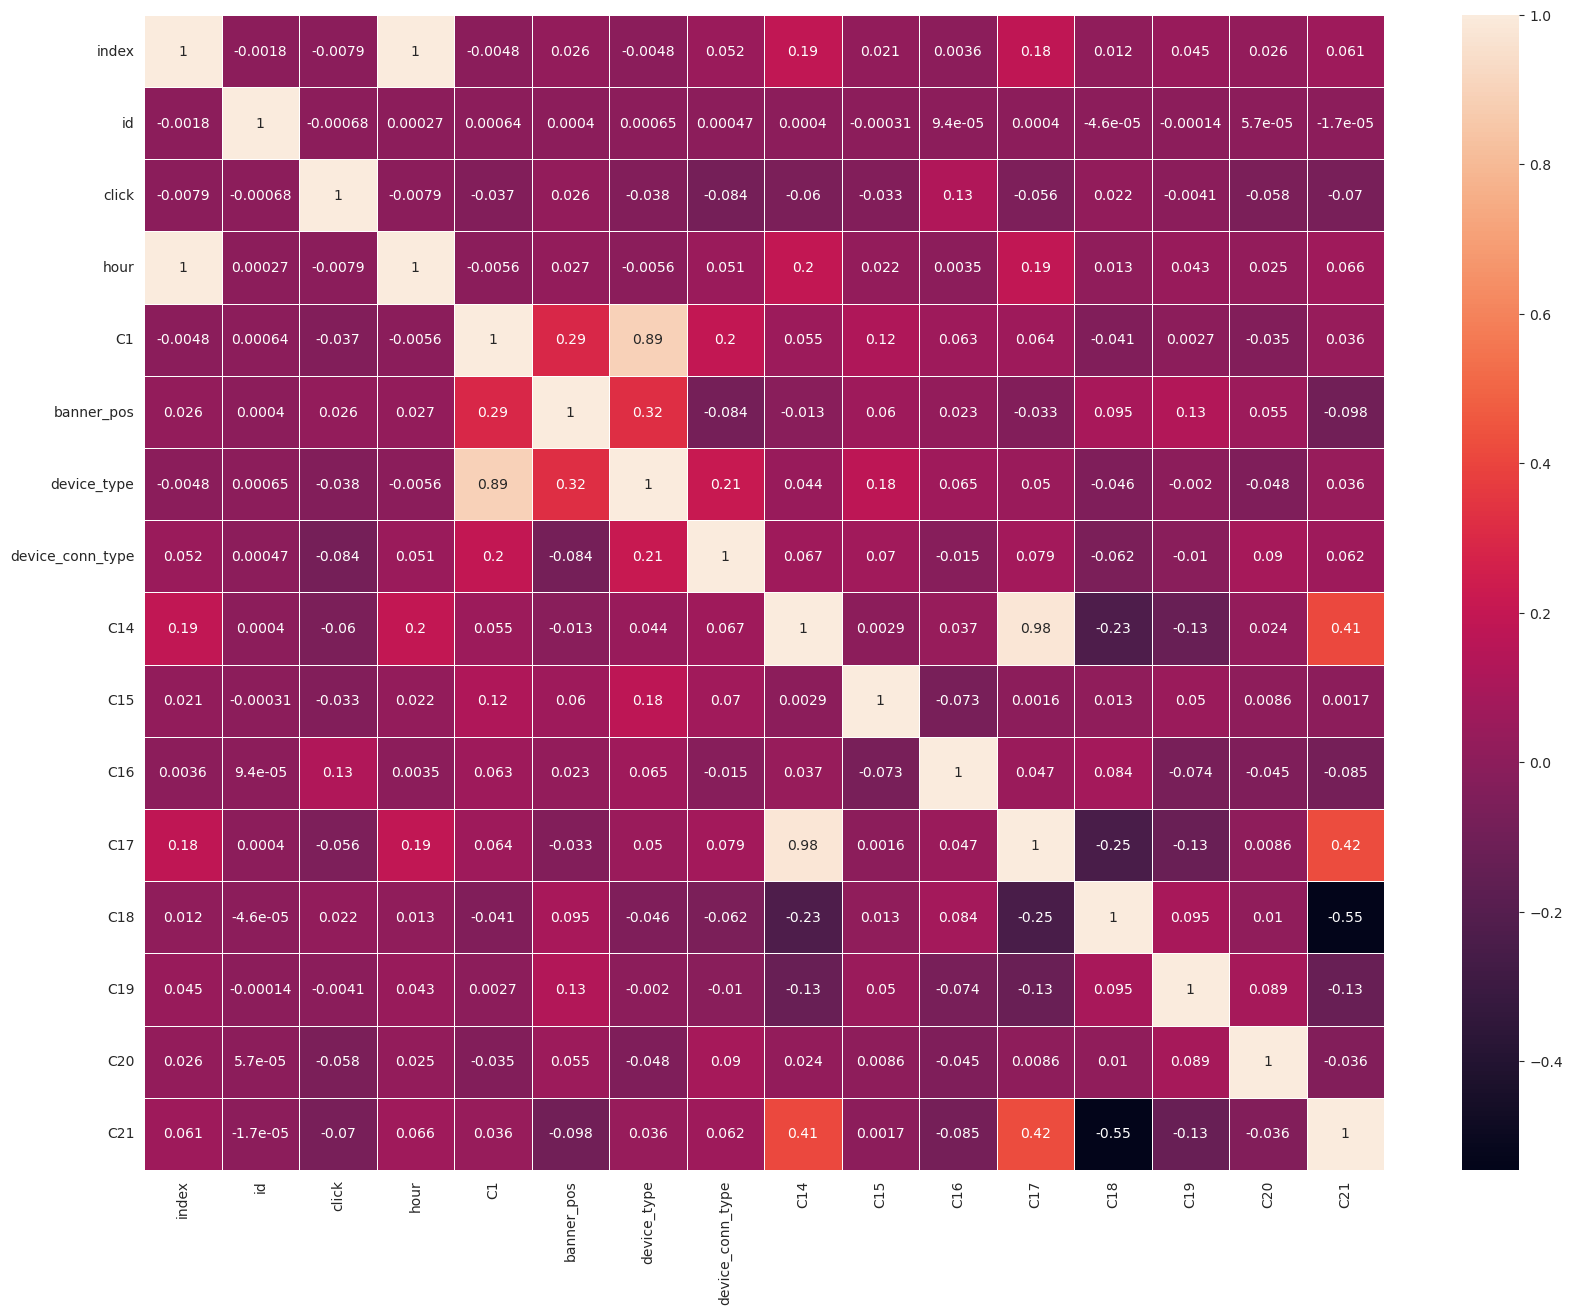

In [10]:
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

In [37]:
numerical = []
categorical = []

for col in (train.columns):
    if train[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['index', 'id', 'click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour_time']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


<Axes: xlabel='click', ylabel='count'>

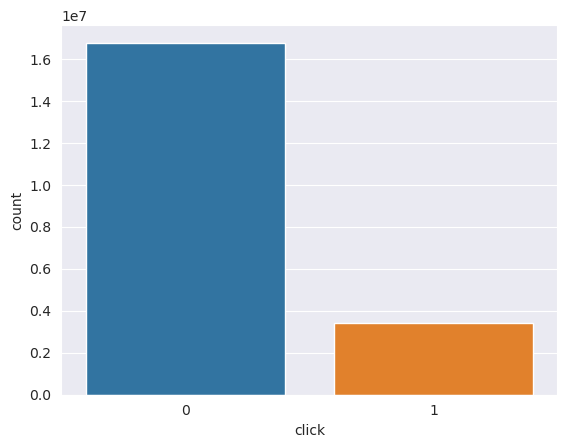

In [39]:
train.click.value_counts(normalize=True)
plt.figure()
sns.countplot(x='click', data=train)


In [46]:
print(f'Unique counts of site_id: {len(train.site_id.unique())}')
print(train.site_id.value_counts(normalize=True))

Unique counts of site_id: 4359
85f751fd   0.36
1fbe01fe   0.16
e151e245   0.07
d9750ee7   0.02
5b08c53b   0.02
           ... 
91eed0b0   0.00
bfef9f08   0.00
46a552bc   0.00
a33ffa4a   0.00
82b4318e   0.00
Name: site_id, Length: 4359, dtype: float64


In [47]:
print(f'Unique counts of site_id: {len(train.site_domain.unique())}')
print(train.site_domain.value_counts(normalize=True))

Unique counts of site_id: 6548
c4e18dd6   0.37
f3845767   0.16
7e091613   0.08
7687a86e   0.03
98572c79   0.02
           ... 
44dd02b0   0.00
cb212bd8   0.00
7afa7294   0.00
40ff965f   0.00
478670d5   0.00
Name: site_domain, Length: 6548, dtype: float64


In [42]:
print(f'Unique counts of site_id: {len(train.site_category.unique())}')
print(train.site_category.value_counts(normalize=True))

Unique counts of site_id: 25
50e219e0   0.41
f028772b   0.31
28905ebd   0.18
3e814130   0.08
f66779e6   0.01
75fa27f6   0.00
335d28a8   0.00
76b2941d   0.00
c0dd3be3   0.00
72722551   0.00
dedf689d   0.00
70fb0e29   0.00
0569f928   0.00
8fd0aea4   0.00
a818d37a   0.00
42a36e14   0.00
e787de0e   0.00
bcf865d9   0.00
5378d028   0.00
9ccfa2ea   0.00
c706e647   0.00
da34532e   0.00
74073276   0.00
110ab22d   0.00
a72a0145   0.00
Name: site_category, dtype: float64


In [43]:
print(f'Unique counts of site_id: {len(train.app_id.unique())}')
print(train.app_id.value_counts(normalize=True))

Unique counts of site_id: 7444
ecad2386   0.64
92f5800b   0.04
e2fcccd2   0.03
9c13b419   0.02
febd1138   0.02
           ... 
f491586e   0.00
925e99a2   0.00
f6314419   0.00
338517ba   0.00
85e54472   0.00
Name: app_id, Length: 7444, dtype: float64


In [45]:
print(f'Unique counts of site_id: {len(train.app_domain.unique())}')
print(train.app_domain.value_counts(normalize=True))

Unique counts of site_id: 474
7801e8d9   0.67
2347f47a   0.13
ae637522   0.05
5c5a694b   0.03
82e27996   0.02
           ... 
a21f883a   0.00
535a6777   0.00
c658acba   0.00
03da86e1   0.00
fc857957   0.00
Name: app_domain, Length: 474, dtype: float64


In [48]:
print(f'Unique counts of site_id: {len(train.app_category.unique())}')
print(train.app_category.value_counts(normalize=True))

Unique counts of site_id: 33
07d7df22   0.65
0f2161f8   0.24
cef3e649   0.04
8ded1f7a   0.04
f95efa07   0.03
d1327cf5   0.00
dc97ec06   0.00
09481d60   0.00
75d80bbe   0.00
fc6fa53d   0.00
4ce2e9fc   0.00
879c24eb   0.00
a3c42688   0.00
4681bb9d   0.00
0f9a328c   0.00
a86a3e89   0.00
2281a340   0.00
8df2e842   0.00
79f0b860   0.00
0bfbc358   0.00
a7fd01ec   0.00
7113d72a   0.00
18b1e0be   0.00
2fc4f2aa   0.00
5326cf99   0.00
0d82db25   0.00
4b7ade46   0.00
bf8ac856   0.00
ef03ae90   0.00
71af18ce   0.00
bd41f328   0.00
86c1a5a3   0.00
6fea3693   0.00
Name: app_category, dtype: float64


In [49]:
print(f'Unique counts of site_id: {len(train.device_id.unique())}')
print(train.device_id.value_counts(normalize=True))

Unique counts of site_id: 1701617
a99f214a   0.83
0f7c61dc   0.00
c357dbff   0.00
936e92fb   0.00
afeffc18   0.00
           ... 
8767f27a   0.00
a56d6e4d   0.00
1f07f753   0.00
89b95ac3   0.00
d3aa1639   0.00
Name: device_id, Length: 1701617, dtype: float64


In [50]:
print(f'Unique counts of site_id: {len(train.device_ip.unique())}')
print(train.device_ip.value_counts(normalize=True))

Unique counts of site_id: 4660174
6b9769f2   0.01
431b3174   0.00
2f323f36   0.00
af9205f9   0.00
930ec31d   0.00
           ... 
fdd54178   0.00
5f6e9456   0.00
0a8205dd   0.00
2911c5ed   0.00
3dbec34f   0.00
Name: device_ip, Length: 4660174, dtype: float64


In [51]:
print(f'Unique counts of site_id: {len(train.device_model.unique())}')
print(train.device_model.value_counts(normalize=True))

Unique counts of site_id: 7692
8a4875bd   0.06
1f0bc64f   0.04
d787e91b   0.03
76dc4769   0.02
be6db1d7   0.02
           ... 
d1263c77   0.00
7b7dc817   0.00
b62eb740   0.00
4fe5d812   0.00
9dbc9c4c   0.00
Name: device_model, Length: 7692, dtype: float64


In [ ]:
import math
n = 2
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.histplot(train[numerical[i]])

plt.tight_layout()
plt.show()

/tmp/ipykernel_35303/578096393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


<Axes: >

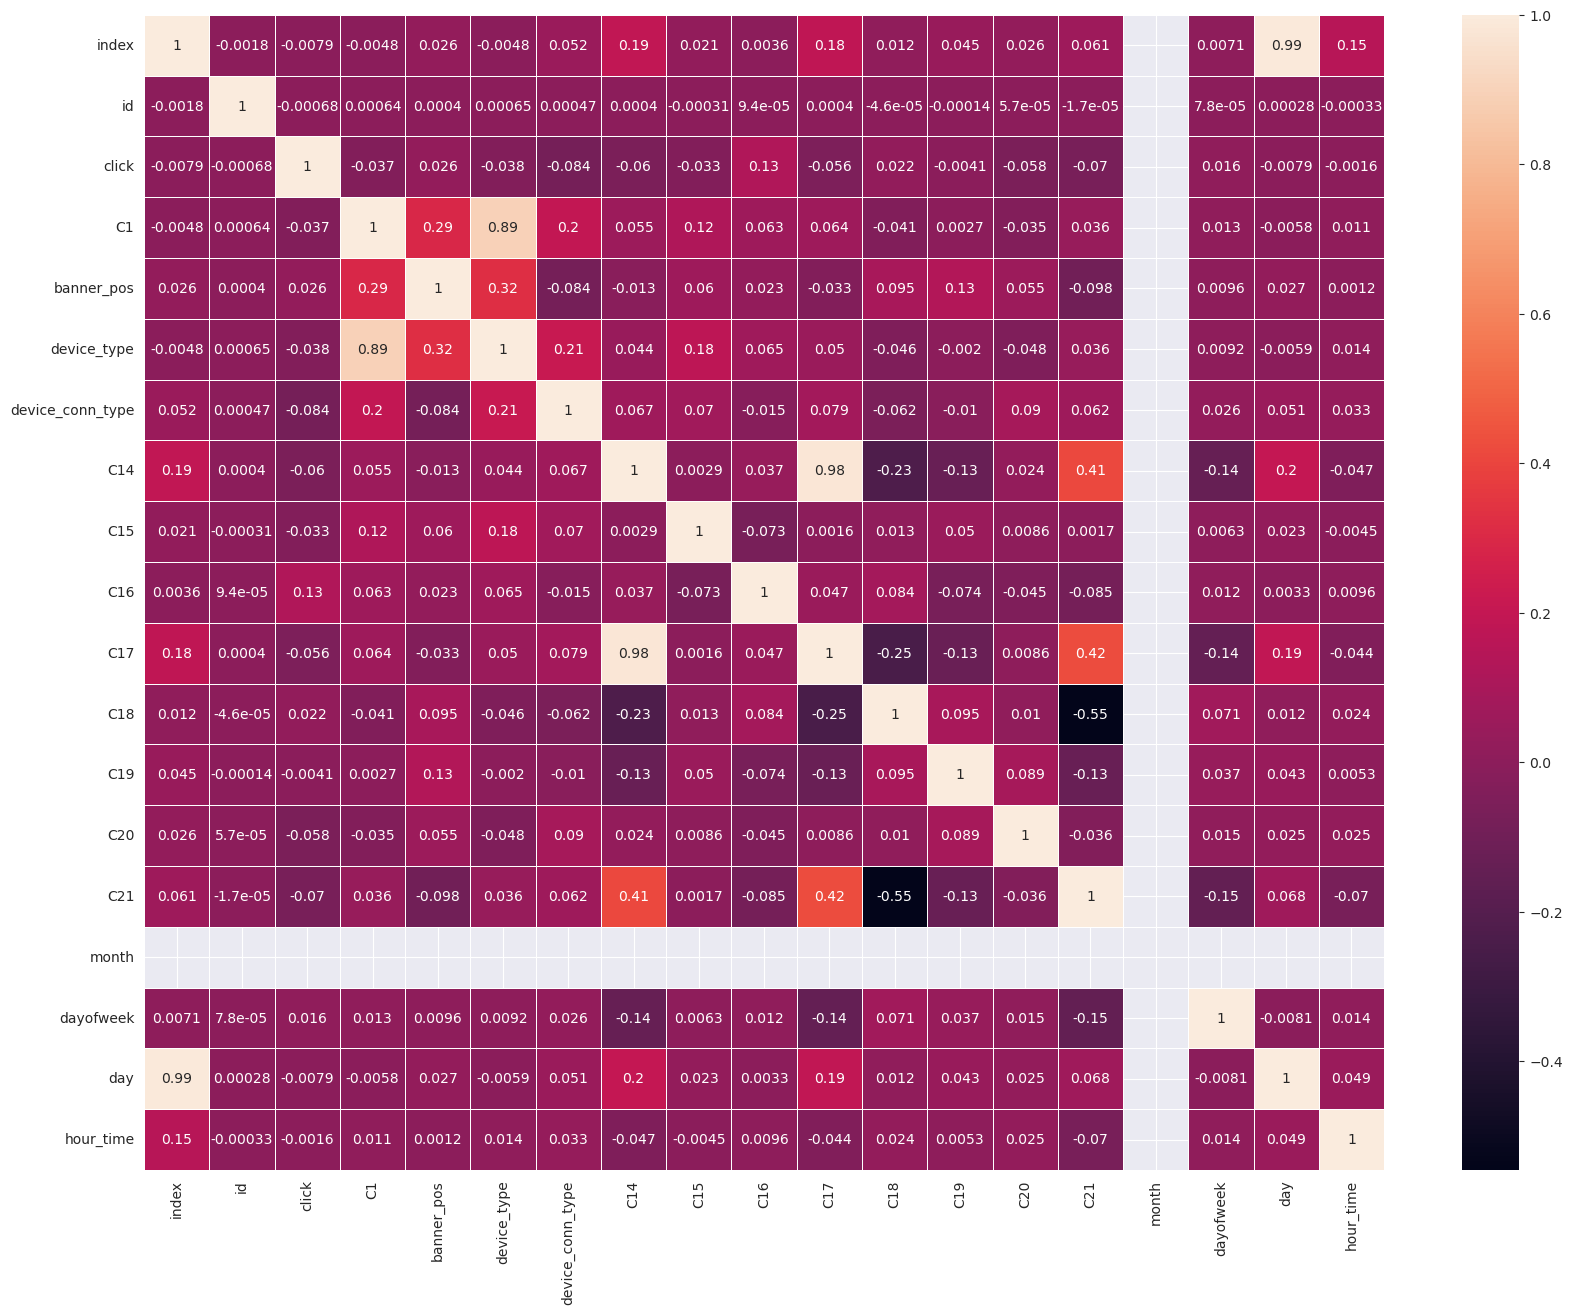

In [54]:
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
correlation = train.corr()
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)